# Python Packages For Applied Mathematics and PyGOM Tutorial

By Martin Grunnill
Given on 16<sup>th</sup> January as part of York University's Practicum in Industrial and Applied Math.

Python is one of the most commonly used coding languages, hosting an extensive array of packages in Data Science, Mathematics and Machine Learning. With a syntax that emphasis readability, Python is considered one of the easiest coding languages to learn. It is also free and open source. Therefore, Python code produced in a research project can be more easily shared with others and is more accessible outside of academic institutions.

This Jupyter notebook is divided into three mandatory and three optional sections:
1. Numpy: provides support for handling multidimensional arrays and matrices.
2. Matplotlib: graphical support.
3. PyGOM: a toolbox for modeling with Ordinary Differential Equations (ODEs). Having been developed by the UK Health Security Agency, PyGOM has an emphasis on epidemiological modelling. Providing functionality not only for solving ODEs, parameter estimation and stochastic simulation, but methods for deriving the basic reproduction number R0.
* Optional:
    4. Pandas: provides access to Dataframe and Serries objects. Dataframes being similar to spreadsheets, with Series being a one-dimensional variant.
    5. Seaborn: highlevel graphical package built on top of matplotlib. Great for producing subplot comparisons or plots comparing tends under different conditions.
    6. Sympy: **sym**bolic algebra in **py**thon. I have provided an extra notebook (from a previous seminar), titled "R0 in Sympy and PyGOM.inpnyb". This extra notebook provides an example of Sympy being used to dervie $R_0$.


# 1. Numpy

At the core of numpy is the ndarray object. Although having similarities to lists (and tupples) in terms of indexing, Ndarrays have some key differences:
* They are of a fixed sized from creation (similar to a tupple). Changing the deminsions of a ndarray results in the creation of a new ndarray.
* They facilitate mathmatical operations at a much faster speed and with less code.

This final point has led to numpy array's being the basis of many python packages in mathematical and scientific computing. As such python based work in this area requires often requires knowledge of numpy arrays.

# 1.1 Creating Arrays.

Lets import numpy and create some ndarrays.

In [1]:
import numpy as np # numpy is often shotened to np in coding:

array_1d = np.array([2,-1,6, 11, 3.14])

In [2]:
array_1d = np.array([3,-1, 11, 3.14])
array_2d = np.array([[ 3, -1 ],
                     [11, 3.14]])
array_3d = np.array([[[ 3, -1 ,2], [2,3.14,3]], [[11, 3.14, 8], [10,11,12]]])

display(array_1d,array_2d,array_3d)

array([ 3.  , -1.  , 11.  ,  3.14])

array([[ 3.  , -1.  ],
       [11.  ,  3.14]])

array([[[ 3.  , -1.  ,  2.  ],
        [ 2.  ,  3.14,  3.  ]],

       [[11.  ,  3.14,  8.  ],
        [10.  , 11.  , 12.  ]]])

Arrays of sequences can be generated using `arange` in similar manner to `range`. **Note** this has an advantage over `range` in that it can handle floats.

In [3]:
display(np.arange(2,5), np.arange(2,3,0.25))

array([2, 3, 4])

array([2.  , 2.25, 2.5 , 2.75])

There are several methods for creating arrays of repeated values:

In [4]:
ones = np.ones((3, 4))
zeros = np.zeros([1,2])
trues = np.full((2,3),True)
display(ones,zeros,trues)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

array([[0., 0.]])

array([[ True,  True,  True],
       [ True,  True,  True]])

# 1.1 Array shape and indexing.

An arrays deminsions can be determined using `.shape`:

In [5]:
display(array_1d.shape,array_2d.shape,array_3d.shape)

(4,)

(2, 2)

(2, 2, 3)

When indexing deminsions are indexed in the same order they are created. This means rows first then columns:

In [6]:
display(array_1d[3], array_2d[1,0], array_3d[1, 1,0])

3.14

11.0

10.0

As well as slices `:` multiple single elements can be indexed:

In [7]:
display(array_1d[:3], array_2d[[1,0],[0,1]])

array([ 3., -1., 11.])

array([11., -1.])

## 1.3 Element wise operations.

Elementwise operations are accessed via the same methods as carried out on floats and ints:

In [8]:
array_2d_b = np.array([[ 8, -5 ],
                       [10, 6]])
addition_array = array_2d + array_2d_b
sub_array = addition_array - array_2d_b
mul_array = array_2d * array_2d_b
div_array = mul_array/ array_2d_b
display(addition_array, sub_array, mul_array, div_array)

array([[11.  , -6.  ],
       [21.  ,  9.14]])

array([[ 3.  , -1.  ],
       [11.  ,  3.14]])

array([[ 24.  ,   5.  ],
       [110.  ,  18.84]])

array([[ 3.  , -1.  ],
       [11.  ,  3.14]])

## 1.4 Further tutorials and reading on numpy.

Now that these basics are covered you may wish to look up Numpy's:
1. [user guide](https://numpy.org/doc/stable/user/index.html#user)
2. [Linear algebra features](https://numpy.org/doc/stable/reference/routines.linalg.html)
3. [Random number generators](https://numpy.org/doc/stable/reference/random/generator.html)

# 2 Matplotlib

Matplotlib is a low level library for creating publishable visulisations in python.

The examples below are largley drawn from [Matplotlib's quick start quide](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start)

Lets import some key plotting objects from matplotlib

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

## 2.1 A simple graph

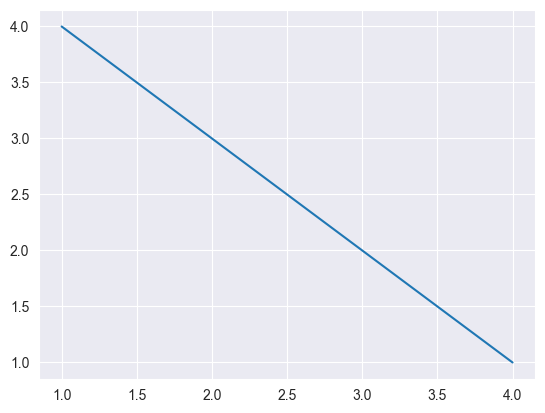

In [10]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], np.arange(4,0,-1))  # Plot some data on the axes.

## 2.2 Anatomy of a figure

Lets use some code to give an example:

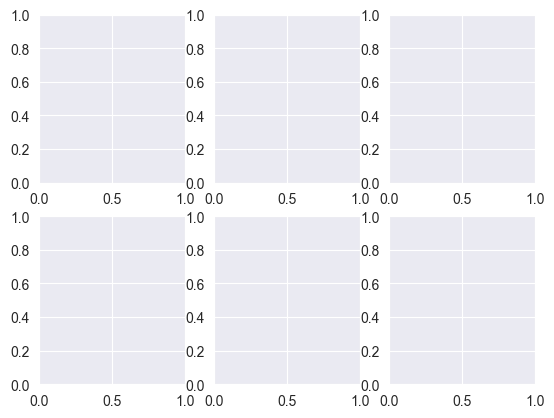

In [11]:
fig, axs = plt.subplots(2, 3)  # a figure with a 2x3 grid of Axes

The parts of a figure:
1. Figure: The whole figure refered above as `fig`. The Figure keeps track of all the child Axes.
2. Axes: Subplots refered above as axs. Single axes can be indexed via `axs[row,column]`. Remember python indexing starts at 0. So to acces the subplot in the first rows 2nd column you would use `axs[0,1]`.
3. Axis: The axis of an Axes (subplot). This how you access: axis labels, scale, limits, ticks (the marks on the Axis) and ticklabels (strings labeling the ticks).

# 2.3 Customising a plot.

Below we will plot several simple functions of x and customise the plot.

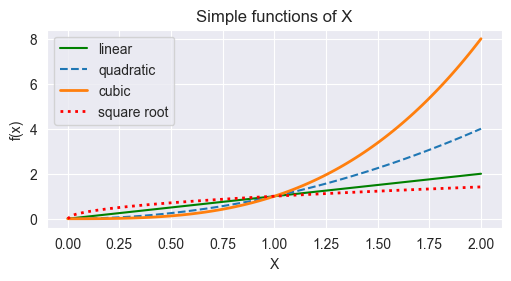

In [12]:
x = np.linspace(0, 2, 100)  # Sample data.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear', color='green')  # Plot some data on the axes. # Change color to green.
ax.plot(x, x**2, label='quadratic', linestyle='dashed')  # Plot more data on the axes using a dashed line.
ax.plot(x, x**3, label='cubic', linewidth=2)  # Plot more data on the axes using a thicker line.
ax.plot(x, x**(1/2), label='square root', color='red', linestyle='dotted', linewidth=2)  # Plot more data on the axes using a thick dotted red line.
ax.set_xlabel('X')  # Add an x-label to the axes.
ax.set_ylabel('f(x)')  # Add a y-label to the axes.
ax.set_title("Simple functions of X")  # Add a title to the axes.
ax.legend()  # Add a legend.

# 2.4 Sugested further reading:

Matplotlib is versitile library for producing many styles of plots. I would recommend looking up the following:
* A more in depth set of tutorials: [https://matplotlib.org/stable/tutorials/index.html](https://matplotlib.org/stable/tutorials/index.html).
* A gallary demonstrating how to make specific plots [https://matplotlib.org/stable/plot_types/index.html](https://matplotlib.org/stable/plot_types/index.html).

# 3. PyGOM

PyGOM — A Python Package for Simplifying Modelling with Systems of Ordinary Differential Equations [https://arxiv.org/pdf/1803.06934.pdf](https://arxiv.org/pdf/1803.06934.pdf)

**Note** PyGOM's documentation tends to draw upon:
Brauer, F., Castillo-Chavez, C., & Feng, Z. (2008). Mathematical models in Epidemiology. In Texts in Applied Mathmatics (Vol. 69). Springer. [https://doi.org/10.1007/978-1-4939-9828-9](https://doi.org/10.1007/978-1-4939-9828-9)

# 3.1 Setting up an ODE system

Using PyGOM, we will set up a simple SIR model. This model has many simplifying assumptions, including:
- no births or deaths
- homogeneous mixing
- no interventions

Suscebtible population (S) are those that can catch the disease. A susceptible person becomes infected when they interact with an infected person. The chance of this interaction resulting in infection is described with parameter $\beta$.

$ \frac{dS}{dt} = -\beta S I$

Infected population (I) recover at rate $\gamma$.

$ \frac{dI}{dt} = \beta S I - \gamma I$

Removed population (R) are those who have immunity (described with initial conditions) or have recovered/died from the disease.

$ \frac{dR}{dt} = \gamma I$

Total population (N) is given by $N = S + I + R$.

In [13]:
from pygom import Transition, TransitionType, SimulateOde # import necesary objects from pygom
import pygom

states = ['S', 'I', 'R']  # Set the states
params = ['beta', 'gamma'] # Set the parameters.

# Setting up models by transitions:
transitions = [Transition(origin='S', destination='I', equation='beta*S*I',
                          transition_type=TransitionType.T),
               Transition(origin='I', destination='R', equation='gamma*I',
                          transition_type=TransitionType.T)]
model = SimulateOde(states, params, transition=transitions)

**Note** if you wanted to a births or deaths you would have to create a seperate list of birth and death transitions, see [https://pygom.readthedocs.io/en/master/transition.html](https://pygom.readthedocs.io/en/master/transition.html). This list of birth and death transitions can be added at initialising `SimulateOde`, through the argument `birth_death`.


You can set up models using euqations (see below). However, stochstic (Continuous Markov) based simulations will not be available.

In [14]:
# Setting up models by equations:
equations = [Transition(origin='S', equation='-beta*S*I', transition_type=TransitionType.ODE),
             Transition(origin='I', equation='beta*S*I - gamma*I', transition_type=TransitionType.ODE),
             Transition(origin='R', equation='gamma*I', transition_type=TransitionType.ODE)]
model_by_equations = SimulateOde(states, params, ode=equations)

You can get several representation of the models ODEs:

In [15]:
model.get_ode_eqn() # Equations for a state variable are printed in the order the variable was entered in the `states` list.

Matrix([
[         -I*S*beta],
[I*S*beta - I*gamma],
[           I*gamma]])

In [16]:
model.print_ode()

⎡dS/dt=    -I⋅S⋅β   ⎤
⎢                   ⎥
⎢dI/dt=  I⋅S⋅β - I⋅γ⎥
⎢                   ⎥
⎣dR/dt=      I⋅γ    ⎦


In [17]:
model.print_ode(latex_output=True) # a latex representation.

\begin{array}{cc}dS/dt= & - I S \beta\\dI/dt= & I S \beta - I \gamma\\dR/dt= & I \gamma\end{array}


## 3.2 Deriving $R_0$

You can use Pygom's `R0` function to find `R0` this uses Next Generation Matrix methods as outlined in:

Brauer, F., Castillo-Chavez, C., & Feng, Z. (2008). The Next Generation Matrix and the Basic Reproduction Number. In Mathmatical Models in Epidimiology (pp. 182–188). Springer. [https://doi.org/10.1007/978-1-4939-9828-9](https://doi.org/10.1007/978-1-4939-9828-9)

Diekmann, O., Heesterbeek, J. A. P., & Roberts, M. G. (2010). The construction of next-generation matrices for compartmental epidemic models. Journal of the Royal Society Interface, 7(47), 873–885. [https://doi.org/10.1098/rsif.2009.0386](https://doi.org/10.1098/rsif.2009.0386)

**Note Again** PyGOM's documentation tends to draw upon:
Brauer, F., Castillo-Chavez, C., & Feng, Z. (2008). Mathematical models in Epidemiology. In Texts in Applied Mathmatics (Vol. 69). Springer. [https://doi.org/10.1007/978-1-4939-9828-9](https://doi.org/10.1007/978-1-4939-9828-9)

In [18]:
import pygom

In [19]:
disease_state='I'
F, V = pygom.disease_progression_matrices(model, disease_state=disease_state) # F is secondary infection rates, V is disease progression rates
eigs = pygom.R0_from_matrix(F,V)
eigs

[S*beta/gamma]

In [20]:
R_0_ = eigs[0]
R_0_

S*beta/gamma

Remember that S at time 0 is approximate to our total population (N). Therefore, $R_0\approx\frac{N\beta}{\gamma}$.

**Note** pygom does have the function `R0` but his sometimes gives the incorrect value of 0. I recommend using the above method in that instance.

# 3.3 Deterministic simulation.


Before we get to the simulations we may want a progress bar as we will running several simulations in a for loop. The package tqdm provides a grate progress bar:

In [21]:
from tqdm import tqdm


Lets simulate some different outbreaks in a small town of 100,000. We will assume that the recovery period remains at 7 days but the $R_0$ is varied via $\beta$ using $\beta=\frac{\gamma R_0}{N}$.

In [22]:
def beta_from_R0(R0,gamma,N):
    """
    Determine beta from R0

    Parameters
    ----------
    R0 : int or float
    gamma : int or float
    N : int or float

    Returns
    -------
    beta : float
    """
    beta = (gamma*R0)/N
    return beta

In [23]:
# Set up gamma:
gamma = 1/7
# set up R0 values
R0s = [1.5, 2, 4, 6, 8, 10]
# Setup initial population:
N = 1000000
I = 1
R = 0
S = N - I - R
initial_population = [S, I, R]


# time
t = np.arange(0,366,1)

# Assign initial time and population to the model
model.initial_state = initial_population
model.initial_time = t[0]

deterministic_solutions = {}
parameters_dict = {'gamma':gamma}
for R0 in tqdm(R0s, desc='R_0 value'): # This actually runs pretty quick we may not need the progress bar.
    parameters_dict['beta'] = beta_from_R0(R0,gamma,N)
    model.parameters = parameters_dict
    deterministic_solutions['R0 = ' + str(R0)] = model.integrate(t[1:])


R_0 value: 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]


In [24]:
deterministic_solutions

{'R0 = 1.5': array([[9.99999000e+05, 1.00000000e+00, 0.00000000e+00],
        [9.99998778e+05, 1.07404117e+00, 1.48082836e-01],
        [9.99998539e+05, 1.15356438e+00, 3.07129901e-01],
        ...,
        [4.17203688e+05, 9.83380631e+00, 5.82786478e+05],
        [4.17202832e+05, 9.32192944e+00, 5.82787846e+05],
        [4.17202020e+05, 8.83669562e+00, 5.82789143e+05]]),
 'R0 = 2': array([[9.99999000e+05, 1.00000000e+00, 0.00000000e+00],
        [9.99998693e+05, 1.15356461e+00, 1.53564962e-01],
        [9.99998339e+05, 1.33071120e+00, 3.30712076e-01],
        ...,
        [2.03187531e+05, 6.11838485e-05, 7.96812469e+05],
        [2.03187531e+05, 5.62089018e-05, 7.96812469e+05],
        [2.03187531e+05, 5.16386569e-05, 7.96812469e+05]]),
 'R0 = 4': array([[ 9.99999000e+05,  1.00000000e+00,  0.00000000e+00],
        [ 9.99998287e+05,  1.53506184e+00,  1.78354269e-01],
        [ 9.99997191e+05,  2.35641373e+00,  4.52139058e-01],
        ...,
        [ 1.98273792e+04, -9.01331409e-11,  9.

Lets plot the solutions:

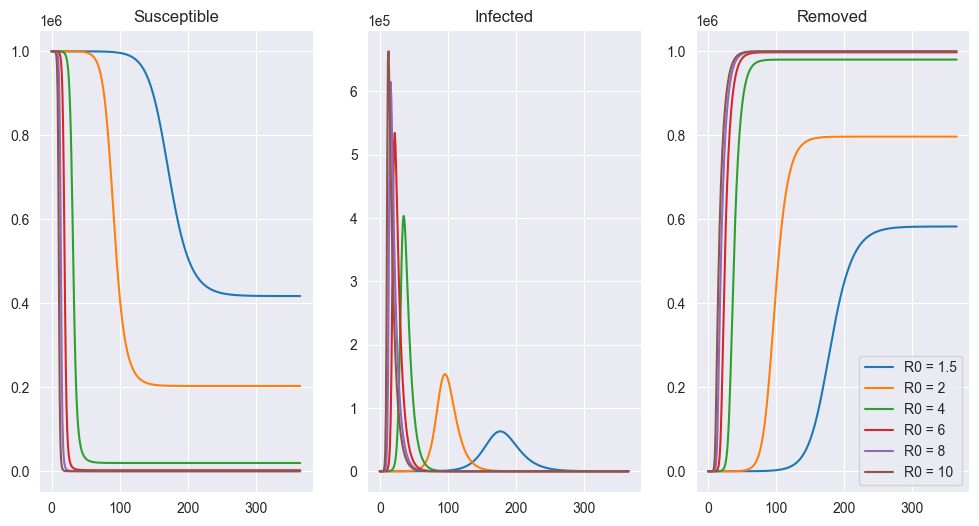

In [25]:
plt.rcParams['figure.figsize'] = [12, 6]

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
for R0 in R0s:
    key = 'R0 = ' + str(R0)
    solution = deterministic_solutions[key]
    ax1.plot(t, solution[:,0], label=key)
    ax2.plot(t, solution[:,1], label=key)
    ax3.plot(t, solution[:,2], label=key)

ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_title('Susceptible')
ax2.set_title('Infected')
ax3.set_title('Removed')
ax3.legend()

Lets find peak infected the time that occured for each simulation.

In [26]:
peak_info = {key: {'infected': max(solution[:,1]), 'time': t[np.argmax(solution[:,1])]}
             for key,solution in deterministic_solutions.items()}
display(peak_info)

{'R0 = 1.5': {'infected': 63023.28214928178, 'time': 177},
 'R0 = 2': {'infected': 153397.28040903818, 'time': 96},
 'R0 = 4': {'infected': 403298.6721407287, 'time': 35},
 'R0 = 6': {'infected': 534346.1275358096, 'time': 22},
 'R0 = 8': {'infected': 615004.1739747707, 'time': 16},
 'R0 = 10': {'infected': 663368.9154326236, 'time': 13}}

# 3.3 Stochastic simulation.

Pygom has the ability to simulate models stochastically via Markov chains.

Lets do ten simulations of our model with our first $R_0$ value.

In [27]:
R0 = R0s[0]
iterations =10
parameters_dict['beta'] = beta_from_R0(R0,gamma,N)
model.parameters = parameters_dict
stochastic_solution = model.simulate_jump(t[1:],iterations)
stochastic_solution # the results of the 10 iterations are held as arrays within a list.

[array([[9.99999e+05, 0.00000e+00, 1.00000e+00],
        [9.99999e+05, 0.00000e+00, 1.00000e+00],
        [9.99999e+05, 0.00000e+00, 1.00000e+00],
        ...,
        [9.99999e+05, 0.00000e+00, 1.00000e+00],
        [9.99999e+05, 0.00000e+00, 1.00000e+00],
        [9.99999e+05, 0.00000e+00, 1.00000e+00]]),
 array([[9.99999e+05, 0.00000e+00, 1.00000e+00],
        [9.99999e+05, 0.00000e+00, 1.00000e+00],
        [9.99999e+05, 0.00000e+00, 1.00000e+00],
        ...,
        [9.99999e+05, 0.00000e+00, 1.00000e+00],
        [9.99999e+05, 0.00000e+00, 1.00000e+00],
        [9.99999e+05, 0.00000e+00, 1.00000e+00]]),
 array([[9.99999e+05, 1.00000e+00, 0.00000e+00],
        [9.99999e+05, 1.00000e+00, 0.00000e+00],
        [9.99999e+05, 1.00000e+00, 0.00000e+00],
        ...,
        [9.99998e+05, 0.00000e+00, 2.00000e+00],
        [9.99998e+05, 0.00000e+00, 2.00000e+00],
        [9.99998e+05, 0.00000e+00, 2.00000e+00]]),
 array([[9.99999e+05, 1.00000e+00, 0.00000e+00],
        [9.99999e+05, 1.

Pygom has a useful method for plotting the results from these solution.

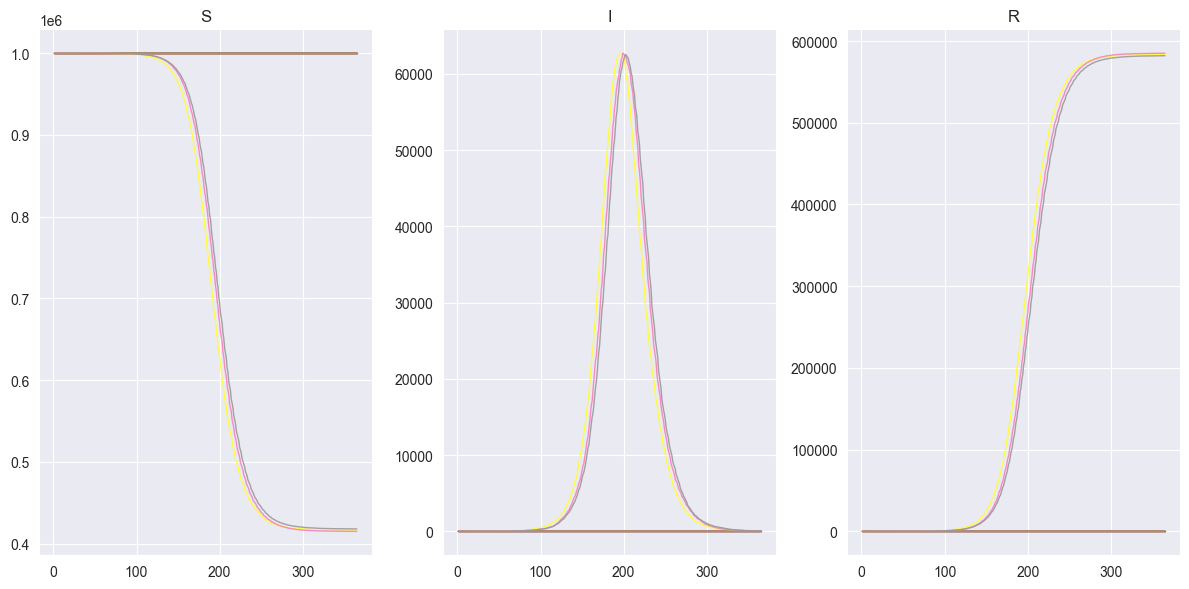

In [28]:
model.plot(stochastic_solution,t[1:])

## 3.4 Some useful notes on PyGOM.

PyGOM has several model fitting procedures (follow hyperlinks below):
* [Simple Square loss](https://github.com/ukhsa-collaboration/pygom/blob/master/notebooks/ParameterEstimation.ipynb)
* [Maximum Liklihood Estimation via gradient decent.](https://github.com/ukhsa-collaboration/pygom/blob/master/notebooks/Testing%20loss%20functions%20fitted%20to%20simulated%20data.ipynb)
* [Approximate Bayesian Computation](https://github.com/ukhsa-collaboration/pygom/blob/master/notebooks/abc_eg.ipynb)

If you plan on doing a large number of stochastic simulations you may wish to look up using parallel processing via dask with pygom. A useful example of pygom intergrating dask is found at [https://github.com/ukhsa-collaboration/pygom/blob/master/notebooks/Demo%20parallel%20stochastic%20simulation.ipynb](https://github.com/ukhsa-collaboration/pygom/blob/master/notebooks/Demo%20parallel%20stochastic%20simulation.ipynb).

As models get larger pygom can get quite slow. This is due to pygom doing alot of human error checking. You may want to look at writing the model yourself using scipy's odeint integrator.


PyGOM's simulate jump method attempts to use Cao's $\tau$-leap first, then use Gillipsie's exact method if jump was not accurate enough. This is not entirely clear from the documentation.

# 4. Pandas (Optional)

Pandas is an increadibly useful package for dealing with data of a tabular form. The name comes from **pan**el **da**ta. Pandas is built around the data type DataFrames which are comprised of Series. Series are 1-dimensional data structures built on top of NumPy's array. DataFrames are 2-dimensional data structures of rows and columns, similar to a spreadsheet, and analogous to a Python dictionary mapping column names (keys) to Series (values), with all the Series sharing a single index.

Much of pandas dataframe design takes inspiration from R's dataframe.

## 4.1 Creating a pandas DataFrame

Here we will run stochastic simulation of our pygom model for our different $R_0$ ($\beta$) values and enter the results into a DataFrame. Lets start by importing pandas.

In [29]:
import pandas as pd

Now we will put our first set of stochastic soluions in a DataFrame.

In [30]:
def pygom_stoch_sols_to_df(stock_sols, time, param_label, param_value):
    num_repeats = len(stock_sols)
    stock_sols = np.vstack(stock_sols) # Vertically stack the arrays.
    df = pd.DataFrame(stock_sols, columns=['Susceptible', 'Infected', 'Recovered'])
    df.insert(0, 'Time', np.tile(time[1:], num_repeats))
    df.insert(0, 'Iteration', np.repeat(range(iterations),len(time[1:])))
    df.insert(0, param_label, np.full(len(stock_sols), param_value))
    return df

df = pygom_stoch_sols_to_df(stock_sols=stochastic_solution, time=t, param_label='R0', param_value=R0)
df

,R0,Iteration,Time,Susceptible,Infected,Recovered
0,1.5,0,1,999999.0,0.0,1.0
1,1.5,0,2,999999.0,0.0,1.0
2,1.5,0,3,999999.0,0.0,1.0
3,1.5,0,4,999999.0,0.0,1.0
4,1.5,0,5,999999.0,0.0,1.0
...,...,...,...,...,...,...
3645,1.5,9,361,999999.0,0.0,1.0
3646,1.5,9,362,999999.0,0.0,1.0
3647,1.5,9,363,999999.0,0.0,1.0
3648,1.5,9,364,999999.0,0.0,1.0


Now that we have a function for changing our stochastic solution into a single data frame we can run several sets of stochastic simulations putting them into a list of dataframes.

In [31]:
dfs = [df]
for R0 in tqdm(R0s[1:], desc='R0'):
    parameters_dict['beta'] = beta_from_R0(R0,gamma,N)
    model.parameters = parameters_dict
    stochastic_solution = model.simulate_jump(t[1:],iterations)
    df = pygom_stoch_sols_to_df(stock_sols=stochastic_solution, time=t, param_label='R0', param_value=R0)
    dfs.append(df)

R0: 100%|██████████| 5/5 [00:14<00:00,  2.84s/it]


A list of pandas dataframes can be concatanated into a single dataframe:

In [32]:
df = pd.concat(dfs)
df

,R0,Iteration,Time,Susceptible,Infected,Recovered
0,1.5,0,1,999999.0,0.0,1.0
1,1.5,0,2,999999.0,0.0,1.0
2,1.5,0,3,999999.0,0.0,1.0
3,1.5,0,4,999999.0,0.0,1.0
4,1.5,0,5,999999.0,0.0,1.0
...,...,...,...,...,...,...
3645,10.0,9,361,4.0,0.0,999996.0
3646,10.0,9,362,4.0,0.0,999996.0
3647,10.0,9,363,4.0,0.0,999996.0
3648,10.0,9,364,4.0,0.0,999996.0


## 4.2 Writing and reading a pandas Dataframe.

 Dataframes can be writen into csv, json files, and excel spreadsheets. Lets write the df dataframe to a csv.

In [33]:
df.to_csv('Stochastic_sim.csv', index=False) # Note without index=False the first column of the csv will be the index.

This csv can also be read into a pandas dataframe:

In [34]:
df = pd.read_csv('Stochastic_sim.csv')
df

,R0,Iteration,Time,Susceptible,Infected,Recovered
0,1.5,0,1,999999.0,0.0,1.0
1,1.5,0,2,999999.0,0.0,1.0
2,1.5,0,3,999999.0,0.0,1.0
3,1.5,0,4,999999.0,0.0,1.0
4,1.5,0,5,999999.0,0.0,1.0
...,...,...,...,...,...,...
21895,10.0,9,361,4.0,0.0,999996.0
21896,10.0,9,362,4.0,0.0,999996.0
21897,10.0,9,363,4.0,0.0,999996.0
21898,10.0,9,364,4.0,0.0,999996.0


## 4.3 Indexing dataframes

Pandas inherits numpy's 2D positional interger indexing through the attribute `iloc`. More on positional indexing can be found at [https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer).

If instead you wish to use a label of a column or a row for index this is done via the attribute `loc`. More on label indexing can be found at [https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label).

You can also index via bool values and conditional statements, see [https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing](https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing).

For more tutorials on indexing see [https://pandas.pydata.org/docs/user_guide/indexing.html](https://pandas.pydata.org/docs/user_guide/indexing.html).



# 5. Seaborn (Optional)

Seaborn is a highlevel graphical package built on top of matplotlib.
Lets start by importing Seaborn

In [35]:
import seaborn as sns

# 5.1 Creating A FacetGrid plot.

Here we will use seaborn to plot our results on a FacetGrid of subplots.
 prefers data in a long format as opposed to wide format. So we first use pandas to `melt` our data into this format.

In [36]:
df.columns # recalls  the column labels.

Index(['R0', 'Iteration', 'Time', 'Susceptible', 'Infected', 'Recovered'], dtype='object')

In [37]:
df_ploting = df.melt(id_vars=['R0', 'Iteration', 'Time'], value_vars=['Susceptible', 'Infected', 'Recovered'], var_name='Population', value_name='People')
df_ploting

,R0,Iteration,Time,Population,People
0,1.5,0,1,Susceptible,999999.0
1,1.5,0,2,Susceptible,999999.0
2,1.5,0,3,Susceptible,999999.0
3,1.5,0,4,Susceptible,999999.0
4,1.5,0,5,Susceptible,999999.0
...,...,...,...,...,...
65695,10.0,9,361,Recovered,999996.0
65696,10.0,9,362,Recovered,999996.0
65697,10.0,9,363,Recovered,999996.0
65698,10.0,9,364,Recovered,999996.0


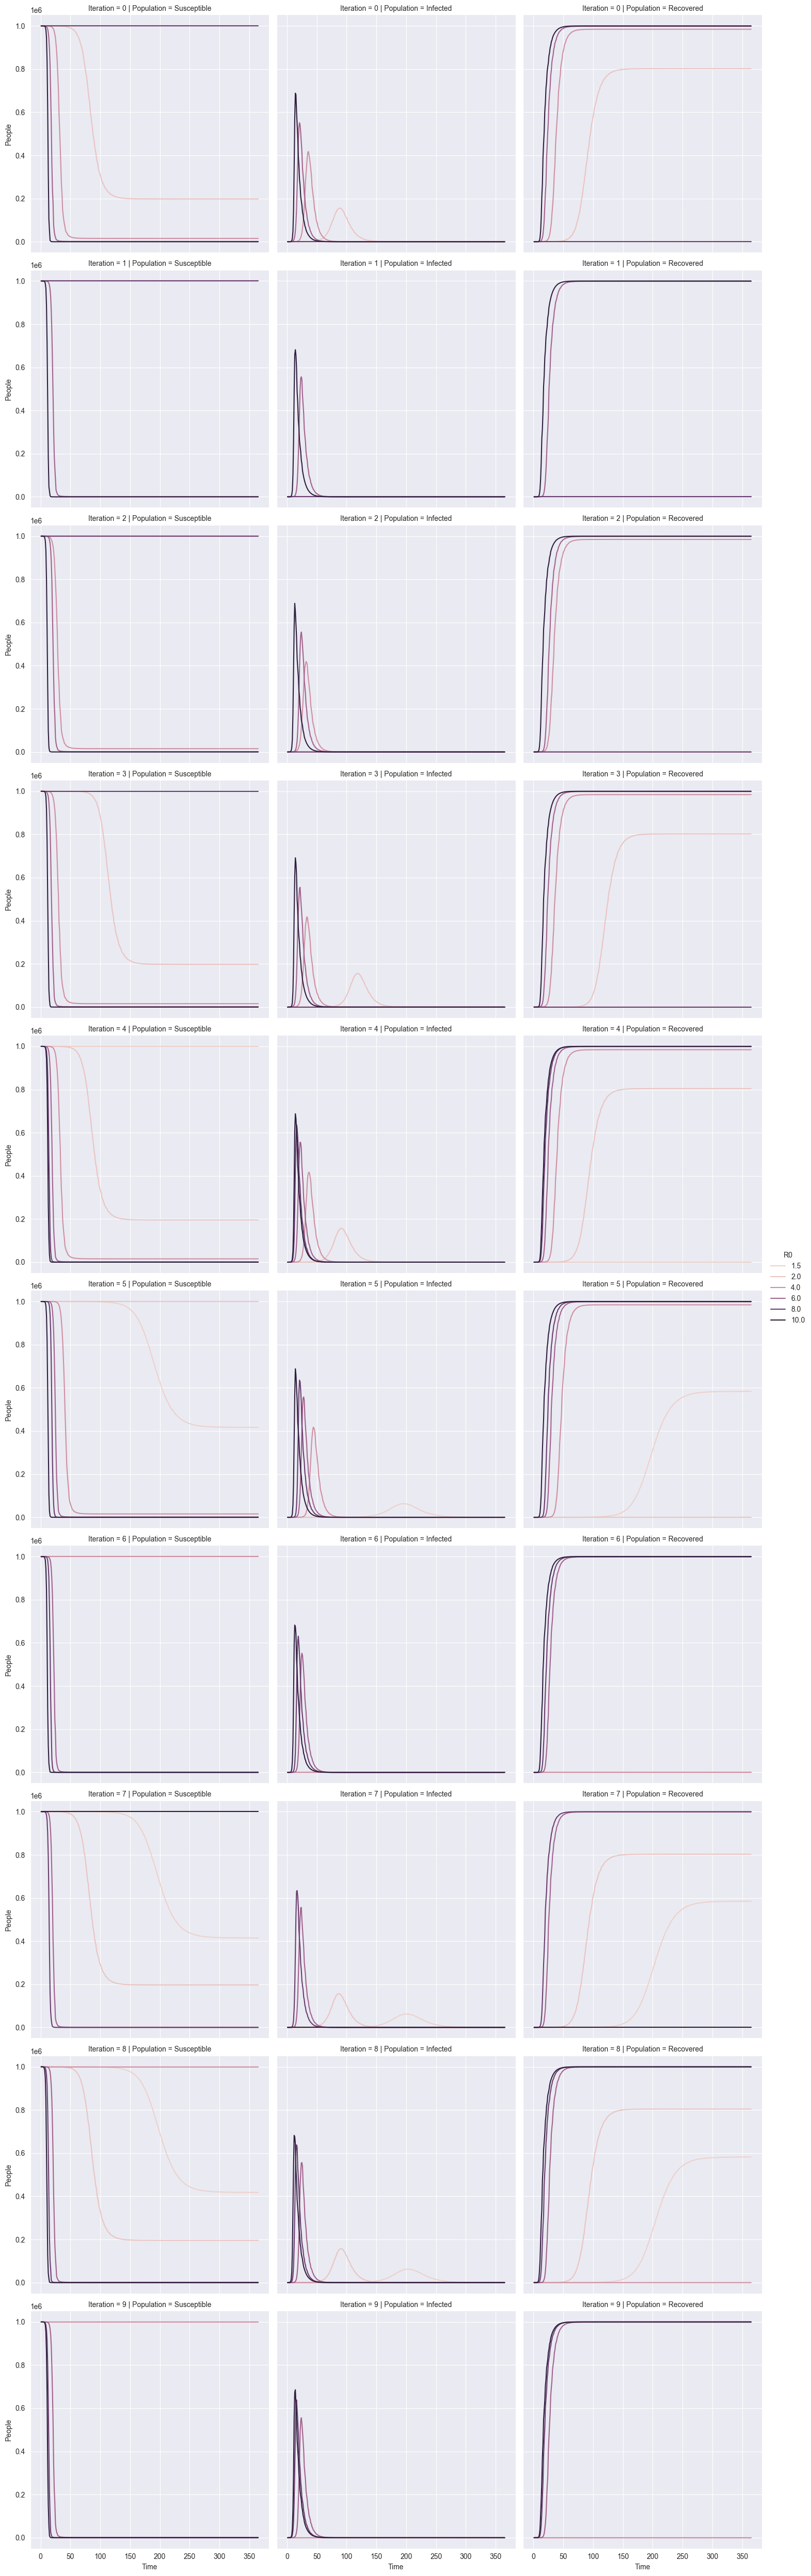

In [38]:
sns.relplot(data=df_ploting, col='Population',row='Iteration', hue='R0',x='Time', y='People', kind='line')

## 5.2 Useful reading on seaborn

Seaborn's own website provide:
* An excellent gallery of example plots you can produce with seaborn: [https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html).
* Useful tutorials: [https://seaborn.pydata.org/tutorial.html](https://seaborn.pydata.org/tutorial.html).

# 6. Sympy (Optional)


Sympy stands for **sym**bolic algebra in **py**thon.
I have provided an extra notebook (from a previous seminar), titled "R0 in Sympy and PyGOM.inpnyb". This extra notebook provides an example of Sympy being used to dervie $R_0$.